In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
low_wind = pd.read_csv('flight_low_wind.csv')
mid_wind = pd.read_csv('flight_mid_wind.csv')
high_wind = pd.read_csv('flight_high_wind.csv')

In [3]:
low_wind_N = pd.read_csv('flight_low_wind_N.csv')
mid_wind_N = pd.read_csv('flight_mid_wind_N.csv')
high_wind_N = pd.read_csv('flight_high_wind_N.csv')

In [29]:
low_wind_early = pd.read_csv('flight_low_wind_early.csv')
mid_wind_early = pd.read_csv('flight_mid_wind_early.csv')
high_wind_early = pd.read_csv('flight_high_wind_early.csv')

In [4]:
low_wind.head()

,# Time (s),Altitude (m),Vertical velocity (m/s),Vertical acceleration (m/s²),Total velocity (m/s),Total acceleration (m/s²),Position East of launch (m),Position North of launch (m),Lateral distance (m),Lateral direction (°),...,Reference length (in),Reference area (cm²),Vertical orientation (zenith) (°),Lateral orientation (azimuth) (°),Wind velocity (m/s),Air temperature (°C),Air pressure (mbar),Speed of sound (m/s),Simulation time step (s),Computation time (s)
0,0.00,0.000000,0.0000,-5.6763,0.00000,5.7075,0.000000,0.0,0.000000,0.0,...,6.2992,201.06,84.0,0.0,NaN,15.0,1013.2,340.39,0.01,0.005616
1,0.01,0.000000,0.0000,61.5730,0.00000,61.9130,0.000000,0.0,0.000000,0.0,...,6.2992,201.06,84.0,0.0,NaN,15.0,1013.2,340.39,0.01,0.006775
2,0.02,0.003079,0.6159,90.4500,0.61929,90.9490,0.000324,0.0,0.000324,0.0,...,6.2992,201.06,84.0,0.0,NaN,15.0,1013.2,340.39,0.01,0.006973
3,0.03,0.013763,1.5208,89.0630,1.52920,89.5530,0.001447,0.0,0.001447,0.0,...,6.2992,201.06,84.0,0.0,NaN,15.0,1013.2,340.39,0.01,0.007159
4,0.04,0.033426,2.4119,88.8140,2.42520,89.3040,0.003513,0.0,0.003513,0.0,...,6.2992,201.06,84.0,0.0,NaN,15.0,1013.2,340.39,0.01,0.007518


In [5]:
low_wind.columns

Index(['# Time (s)', 'Altitude (m)', 'Vertical velocity (m/s)',
       'Vertical acceleration (m/s²)', 'Total velocity (m/s)',
       'Total acceleration (m/s²)', 'Position East of launch (m)',
       'Position North of launch (m)', 'Lateral distance (m)',
       'Lateral direction (°)', 'Lateral velocity (m/s)',
       'Lateral acceleration (m/s²)', 'Latitude (°)', 'Longitude (°)',
       'Gravitational acceleration (m/s²)', 'Angle of attack (°)',
       'Roll rate (r/s)', 'Pitch rate (r/s)', 'Yaw rate (r/s)', 'Mass (g)',
       'Propellant mass (g)', 'Longitudinal moment of inertia (kg·m²)',
       'Rotational moment of inertia (kg·m²)', 'CP location (in)',
       'CG location (in)', 'Stability margin calibers (​)', 'Mach number (​)',
       'Reynolds number (​)', 'Thrust (N)', 'Drag force (N)',
       'Drag coefficient (​)', 'Axial drag coefficient (​)',
       'Friction drag coefficient (​)', 'Pressure drag coefficient (​)',
       'Base drag coefficient (​)', 'Normal force coeffic

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


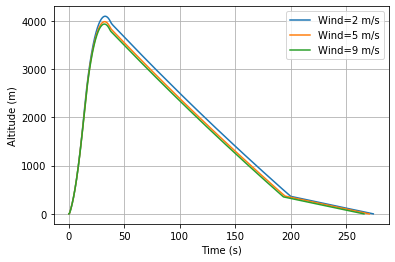

In [6]:
plt.plot(low_wind['# Time (s)'], low_wind['Altitude (m)'], label='Wind=2 m/s')
plt.plot(mid_wind['# Time (s)'], mid_wind['Altitude (m)'], label='Wind=5 m/s')
plt.plot(high_wind['# Time (s)'], high_wind['Altitude (m)'], label='Wind=9 m/s')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.legend()

plt.savefig('Alt-Time.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


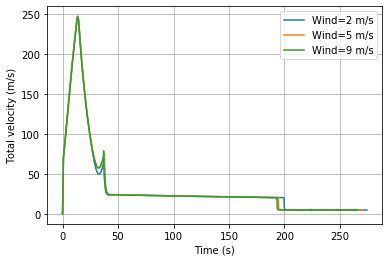

In [7]:
plt.plot(low_wind['# Time (s)'], low_wind['Total velocity (m/s)'], label='Wind=2 m/s')
plt.plot(mid_wind['# Time (s)'], mid_wind['Total velocity (m/s)'], label='Wind=5 m/s')
plt.plot(high_wind['# Time (s)'], high_wind['Total velocity (m/s)'], label='Wind=9 m/s')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Total velocity (m/s)')
plt.legend()

plt.savefig('Vel-Time.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


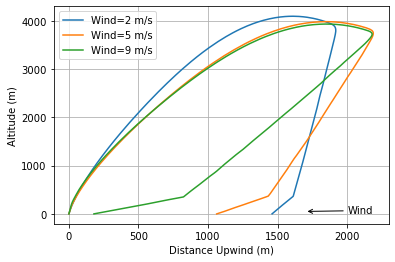

In [8]:
plt.plot(low_wind['Position East of launch (m)'], low_wind['Altitude (m)'], label='Wind=2 m/s')
plt.plot(mid_wind['Position East of launch (m)'], mid_wind['Altitude (m)'], label='Wind=5 m/s')
plt.plot(high_wind['Position East of launch (m)'], high_wind['Altitude (m)'], label='Wind=9 m/s')
plt.grid(True)
plt.xlabel('Distance Upwind (m)')
plt.ylabel('Altitude (m)')
plt.legend()

ax = plt.gca()
ax.annotate("Wind", xy=(1700, 50), xytext=(2000, 5), arrowprops=dict(arrowstyle="->"))

plt.savefig('Alt-Drift.eps')

In [9]:
print('max distance travelled into wind')
print(max(low_wind['Position East of launch (m)']))
print(max(mid_wind['Position East of launch (m)']))
print(max(high_wind['Position East of launch (m)']))

max distance travelled into wind
1917.9
2187.5
2179.4


In [10]:
print('landing distance into wind')
print(list(low_wind['Position East of launch (m)'])[-1])
print(list(mid_wind['Position East of launch (m)'])[-1])
print(list(high_wind['Position East of launch (m)'])[-1])

landing distance into wind
1460.1
1061.9
179.69


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


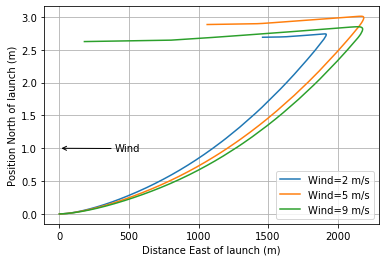

In [11]:
plt.plot(low_wind['Position East of launch (m)'], low_wind['Position North of launch (m)'], label='Wind=2 m/s')
plt.plot(mid_wind['Position East of launch (m)'], mid_wind['Position North of launch (m)'], label='Wind=5 m/s')
plt.plot(high_wind['Position East of launch (m)'], high_wind['Position North of launch (m)'], label='Wind=9 m/s')
plt.grid(True)
plt.xlabel('Distance East of launch (m)')
plt.ylabel('Position North of launch (m)')


ax = plt.gca()
ax.annotate("Wind", xy=(0, 1), xytext=(400, 0.95), arrowprops=dict(arrowstyle="->"))

plt.legend()
plt.savefig('GroundTrack_into_wind.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


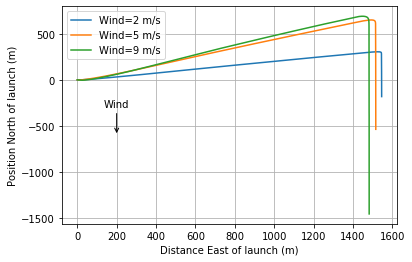

In [20]:
plt.plot(low_wind_N['Position East of launch (m)'], low_wind_N['Position North of launch (m)'], label='Wind=2 m/s')
plt.plot(mid_wind_N['Position East of launch (m)'], mid_wind_N['Position North of launch (m)'], label='Wind=5 m/s')
plt.plot(high_wind_N['Position East of launch (m)'], high_wind_N['Position North of launch (m)'], label='Wind=9 m/s')
plt.grid(True)
plt.xlabel('Distance East of launch (m)')
plt.ylabel('Position North of launch (m)')


ax = plt.gca()
ax.annotate("Wind", xy=(200, -600), xytext=(135, -300), arrowprops=dict(arrowstyle="->"))

plt.legend()
plt.savefig('GroundTrack_90_from_wind.eps')

In [28]:
print('Max landing distance if launched in different direction to wind')
print(list(((low_wind_N['Position East of launch (m)'])**2 + (low_wind_N['Position North of launch (m)'])**2)**0.5)[-1])
print(list(((mid_wind_N['Position East of launch (m)'])**2 + (mid_wind_N['Position North of launch (m)'])**2)**0.5)[-1])
print(list(((high_wind_N['Position East of launch (m)'])**2 + (high_wind_N['Position North of launch (m)'])**2)**0.5)[-1])

Max landing distance if launched in different direction to wind
1555.999510314833
1607.5713864398058
2075.2496934104097


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


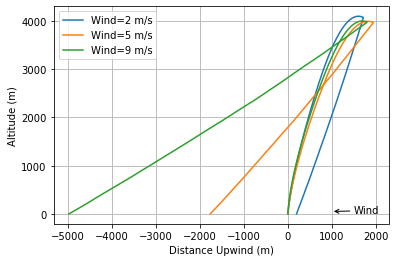

In [34]:
plt.plot(low_wind_early['Position East of launch (m)'], low_wind_early['Altitude (m)'], label='Wind=2 m/s')
plt.plot(mid_wind_early['Position East of launch (m)'], mid_wind_early['Altitude (m)'], label='Wind=5 m/s')
plt.plot(high_wind_early['Position East of launch (m)'], high_wind_early['Altitude (m)'], label='Wind=9 m/s')
plt.grid(True)
plt.xlabel('Distance Upwind (m)')
plt.ylabel('Altitude (m)')
plt.legend()

ax = plt.gca()
ax.annotate("Wind", xy=(1000, 50), xytext=(1500, 5), arrowprops=dict(arrowstyle="->"))

plt.savefig('Alt-Drift_earlyDeploy.eps')